<a href="https://colab.research.google.com/github/Nippur7/MachineLearningUNSA/blob/main/UnSA_TP_RedesN_Matich_Carlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO PRACTICO- REDES NEURONALES***




#Matich Cuezzo, Carlos Antonio, 28157071, tonymatich@hotmail.com

Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año.Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del sigueinte enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos.


1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

<hr>
<hr>

#Desarrollo



---



---



<br>

### Consigna 1º

<ol type='a'>
<li>Seleccionar una ciudad a partir del archivo csv ingestado.</li>
<li>Crear una columna con la temperatura promedio de cada día.</li>
<li>Generar un gráfico de línea donde la ordenada sea el día y la absisa la temperatura_promedio.</li>
<li>Seleccionar un periodo donde se muestre una temperatura creciente en esa ciudad</li>
</ol>

<code>Seleccionar una ciudad</code><br>
a. Leemos los datos a partir del archivo .txt en la carpeta de Google Drive. Le damos la codificación que usa e ignoramos las tres primeras entradas que no corresponden a datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url_txt='https://drive.google.com/file/d/1XrxozIFzCFx9oaDlubYMc10H1GWcQhc-/view?usp=drive_link'
url_txt='https://drive.google.com/uc?id=' + url_txt.split('/')[-2]
codificacion = "ISO-8859-1"
df = pd.read_fwf(url_txt, skiprows=3, header=None, names=["FECHA_N", "TMAX", "TMIN", "NOMBRE"], encoding=codificacion)

Quitamos los valores NaN

In [2]:
df.dropna(axis=0, inplace=True)

Conversión del campo FECHA

In [3]:
df['FECHA'] = df['FECHA_N'].apply(lambda x: str(x).zfill(8))

In [4]:
import datetime as dt
df['FECHA_F'] = pd.to_datetime(df['FECHA'], dayfirst=True,exact=False,errors='coerce',format='%d%m%Y')
df['FECHA_S'] = df['FECHA_F'].map(dt.datetime.toordinal)

In [5]:
df_fecha = df.drop(['FECHA_N','FECHA_S'], axis=1)

In [6]:
df['T_PROM'] = df_fecha.mean(numeric_only=True, axis=1) #Agrega una columna con el promedio de los valores numéricos

In [7]:
lugares = df['NOMBRE'].unique()

Codificamos los nombres de las Bases Usando el LabelEncoder de la librería sklearn

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
lugares_codec = enc.fit_transform(lugares)

In [9]:
#Juntamos la lista de Bases únicas con la codificación de bases
df_opciones = pd.DataFrame((zip(lugares,lugares_codec)), columns = ['Lugar','Código'])
df_opciones = df_opciones.reset_index(drop=True)

Armamos el menú para elegir la base con la cual trabajar

In [10]:
from tabulate import tabulate

In [45]:

pase = False
res=[]
#print(df_opciones)
df_opciones.sort_values(by=['Código'], inplace=True)
print(tabulate(df_opciones, headers='keys', tablefmt='rounded_outline', showindex=False))
while pase == False:
  opcion = int(input("Seleccione el número de la Base: "))
  if (opcion >=0 and opcion <= len(lugares)):
    break
  else:
    print("Opción incorrecta, ingrese nuevamente")
res.append(opcion)
response = enc.inverse_transform(res)
print("Usted seleccionó la base: ",response)
filtro_lugar = df['NOMBRE'] == response[0]
df_filtrado = df[filtro_lugar]

╭───────────────────────────────────┬──────────╮
│ Lugar                             │   Código │
├───────────────────────────────────┼──────────┤
│ AEROPARQUE AERO                   │        0 │
│ AZUL AERO                         │        1 │
│ BAHIA BLANCA AERO                 │        2 │
│ BARILOCHE AERO                    │        3 │
│ BASE BELGRANO II                  │        4 │
│ BASE CARLINI (EX JUBANY)          │        5 │
│ BASE ESPERANZA                    │        6 │
│ BASE MARAMBIO                     │        7 │
│ BASE ORCADAS                      │        8 │
│ BASE SAN MARTIN                   │        9 │
│ BENITO JUAREZ AERO                │       10 │
│ BERNARDO DE IRIGOYEN AERO         │       11 │
│ BOLIVAR AERO                      │       12 │
│ BUENOS AIRES OBSERVATORIO         │       13 │
│ CAMPO DE MAYO AERO                │       14 │
│ CATAMARCA AERO                    │       15 │
│ CERES AERO                        │       16 │
│ CHAMICAL AERO     

Gráfica de los datos filtrados

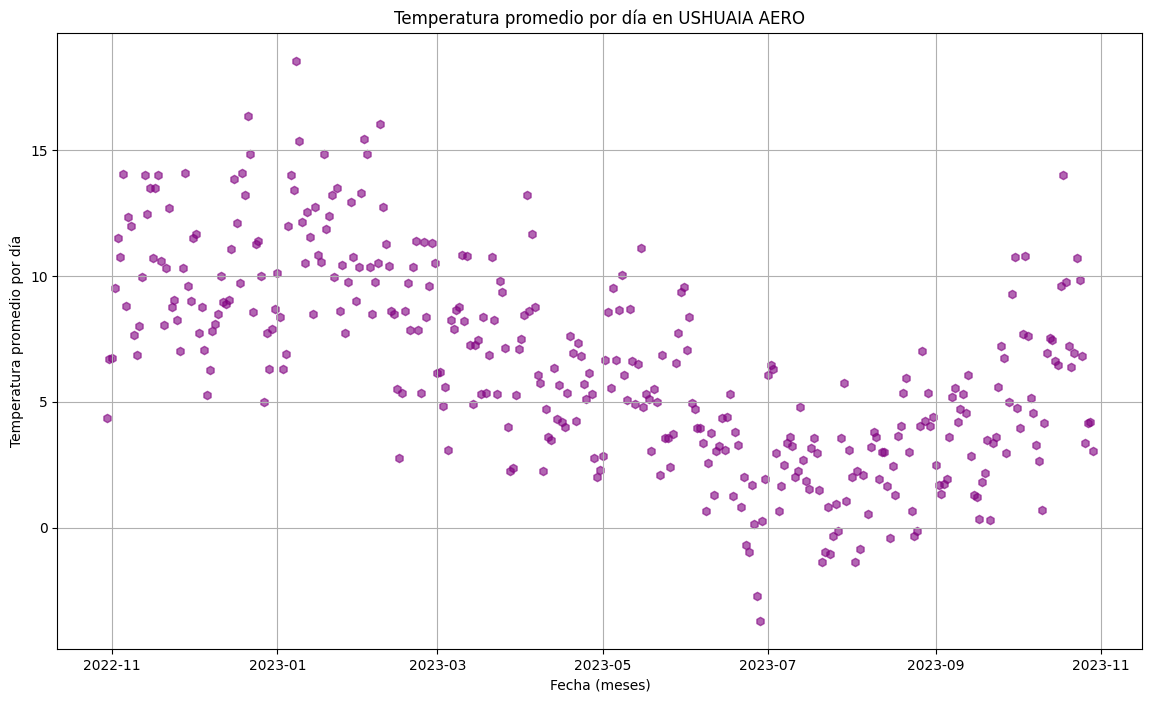

In [46]:
plt.figure(figsize=(14, 8))
plt.scatter(df_filtrado['FECHA_F'], df_filtrado['T_PROM'], marker='h', color='purple', linestyle='-', alpha = 0.6)
plt.xlabel('Fecha (meses)')
plt.ylabel('Temperatura promedio por día')
plt.title('Temperatura promedio por día en '+response[0])
plt.grid(True)
plt.show()



---



---



<details><summary><b>2. Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:<b></summary>
<li> VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR, a menor temperatura el precio será menor. Definir el rango del precio del helado y la tasa o porcentaje de incremento del precio</li>

<li>COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.
</li></details>

###Generando la recta de regresión en base a los datos filtrados

In [47]:
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
#poly_features = PolynomialFeatures(degree=3, include_bias=False)


In [48]:
X_train, x_test, y_train, y_test = train_test_split(df_filtrado.FECHA_S,df_filtrado.T_PROM)

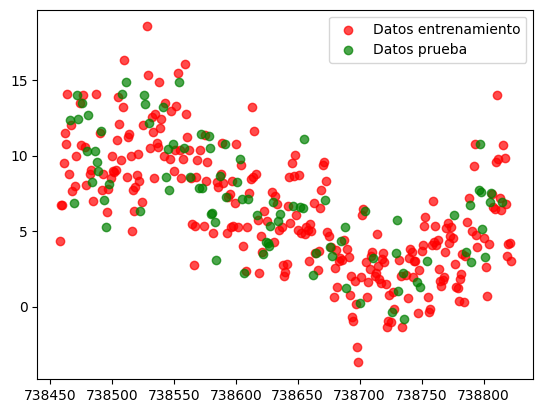

In [49]:
plt.scatter(X_train, y_train, label='Datos entrenamiento', color='r', alpha=0.7)
plt.scatter(x_test, y_test, label='Datos prueba', color='g', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
#Creando el modelo de regresion
#x_poly = poly_features.fit_transform(X_train.values.reshape(-1,1))
#lReg = LinearRegression()
#lReg.fit(X=x_poly, y=y_train.values)



In [50]:
modelo_poly = np.poly1d(np.polyfit(X_train,y_train,3))

In [17]:
modelo_poly

poly1d([ 1.81061061e-06, -4.01206823e+00,  2.96340013e+06, -7.29610402e+11])

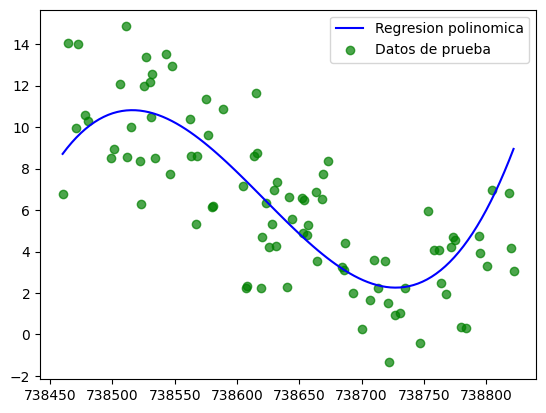

In [18]:
x_vals = np.linspace(min(x_test), max(x_test), 100)

# Calcula los valores de y para los nuevos puntos x
y_vals = modelo_poly(x_vals)

# Grafica los resultados con más puntos
plt.plot(x_vals, y_vals, label='Regresion polinomica', color='b')
plt.scatter(x_test, y_test, label='Datos de prueba', color='g', alpha=0.7)
plt.legend()
plt.show()

#Calculando el precio del Helado

---




Aquí usamos la **recta de regresión** obtenida en base a la fecha (codificada, encapsulada en una función que nos permita calcular usando la función lambda el **Feature** del ***Precio del Kg de Helado***, con una componente aleatoria pequeña que puede sumar o restar.

In [51]:
#x_prueba=[]
#x_prueba.append(738804)
p = 738458
#y_prueba = lReg.predict(np.array(p).reshape(-1,1))
y_prueba = modelo_poly(np.array(p))
print(float(y_prueba))

8.6168212890625


In [52]:
import random as rd
def precioKgHelado(fecha,base):#Función que devuelve el precio del helado, con una componente aleatoria
  y = float(modelo_poly(np.array(fecha)))
  return(y/19*base+ (rd.random()* (-1^int(rd.random()*10))))



In [53]:
print(precioKgHelado(738460,4000))

1844.5164513677346


In [54]:
df_filtrado['PRECIO_KG_HELADO'] = df['FECHA_S'].apply(lambda x: precioKgHelado(x,4000))

<ipython-input-54-071de7d136e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PRECIO_KG_HELADO'] = df['FECHA_S'].apply(lambda x: precioKgHelado(x,4000))


In [55]:
df_filtrado.tail()

,FECHA_N,TMAX,TMIN,NOMBRE,FECHA,FECHA_F,FECHA_S,T_PROM,PRECIO_KG_HELADO
43186,3112022,18.5,4.5,USHUAIA AERO,03112022,2022-11-03,738462,11.50,1876.618963
43307,2112022,16.6,2.4,USHUAIA AERO,02112022,2022-11-02,738461,9.50,1860.585920
43428,1112022,9.5,4.0,USHUAIA AERO,01112022,2022-11-01,738460,6.75,1846.523266
43549,31102022,11.0,2.4,USHUAIA AERO,31102022,2022-10-31,738459,6.70,1827.335441
43670,30102022,7.2,1.5,USHUAIA AERO,30102022,2022-10-30,738458,4.35,1812.364333


In [56]:
# Definimos la función de simulación de la variable categórica "COMPRA HELADO"
def simular_compra(n_registros, precio_base=4000, prob_no_compra=0.8):
    compras = []
    for _ in range(n_registros):
        if np.random.rand() < prob_no_compra:
            compras.append(0)
        else:
            compras.append(1)
    return compras

# Simulamos la variable categórica "COMPRA HELADO" con la longitud de df_filtrado
compras_simuladas = simular_compra(len(df_filtrado))

# Definimos los pesos de manera aleatoria para los perceptrones
weights1 = np.random.rand(2)
weights2 = np.random.rand(2)
weights3 = np.random.rand(2)

# Función de activación (puedes elegir entre la función de salto finito o la función sigmoide)
def step_function(x):
    return 1 if x >= 0 else 0

# Implementamos los perceptrones
def perceptron(temperatura, precio, weights):
    input_data = np.array([temperatura, precio])
    weighted_sum = np.dot(input_data, weights)
    return step_function(weighted_sum)

# Implementamos las condiciones
def red_neuronal(temperatura, precio):
    if temperatura > 27 or precio < 1.4 * 4000:
        return 1
    else:
        output1 = perceptron(temperatura, precio, weights1)
        output2 = perceptron(temperatura, precio, weights2)
        output3 = perceptron(temperatura, precio, weights3)
        if output1 and output2 and output3:
            return 1
        else:
            return 0

# Evaluamos la precisión de la red neuronal
def evaluar_precision(compras_reales, compras_predichas):
    aciertos = 0
    for real, predicho in zip(compras_reales, compras_predichas):
        if real == predicho:
            aciertos += 1
    return aciertos / len(compras_reales)

# Tomamos los valores de TEMPERATURA PROMEDIO y PRECIO DEL HELADO de df_filtrado
temperaturas_filtradas = df_filtrado['T_PROM'].values
precios_filtrados = df_filtrado['PRECIO_KG_HELADO'].values

# Evaluamos la precisión de la red neuronal
compras_predichas = [red_neuronal(temp, precio) for temp, precio in zip(temperaturas_filtradas, precios_filtrados)]
precision = evaluar_precision(compras_simuladas, compras_predichas)
print(f'Precisión de la red neuronal: {precision}')


Precisión de la red neuronal: 0.19230769230769232


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Simulamos la variable categórica "COMPRA HELADO" con una proporción del 80% de registros
def simular_compra_k(df, precio_base=4000, prob_no_compra=0.8):
    compras = []
    for index, row in df.iterrows():
        if (row['T_PROM'] > 27) and ((row['PRECIO_KG_HELADO']/precio_base) < 1.4):
            compras.append(1)
        else:
            if np.random.rand() < prob_no_compra:
                compras.append(0)
            else:
                compras.append(1)
    return compras

# Simulamos la variable categórica "COMPRA HELADO" con la longitud de df_filtrado
compras_simuladas_k = simular_compra_k(df_filtrado)

# Preparamos los datos para la red neuronal
X = df_filtrado[['TMAX', 'TMIN', 'T_PROM']].values
y = np.array(compras_simuladas_k)

# Escalamos los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de red neuronal con Keras
model = Sequential([
    Dense(8, input_dim=3, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ajustamos el modelo
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

# Evaluamos el modelo
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión de la red neuronal con Keras: {accuracy}')


Precisión de la red neuronal con Keras: 0.8082191944122314


In [58]:
df_filtrado['COMPRAR'] = compras_simuladas_k
df_filtrado['COMPRAR_PRED'] = model.predict(X)


12/12 [==============================] - 0s 2ms/step


<ipython-input-58-b39c7b858f59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['COMPRAR'] = compras_simuladas_k
<ipython-input-58-b39c7b858f59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['COMPRAR_PRED'] = model.predict(X)


In [44]:
df_filtrado.round(({'T_PROM': 2, 'PRECIO_KG_HELADO': 2, 'COMPRAR_PRED':0}))

,FECHA_N,TMAX,TMIN,NOMBRE,FECHA,FECHA_F,FECHA_S,T_PROM,PRECIO_KG_HELADO,COMPRAR,COMPRAR_PRED
110,29102023,5.9,0.2,USHUAIA AERO,29102023,2023-10-29,738822,3.05,1882.52,1,1.0
229,28102023,7.6,0.8,USHUAIA AERO,28102023,2023-10-28,738821,4.20,1850.34,1,1.0
348,27102023,8.0,0.3,USHUAIA AERO,27102023,2023-10-27,738820,4.15,1814.92,1,1.0
467,26102023,5.4,1.3,USHUAIA AERO,26102023,2023-10-26,738819,3.35,1785.83,1,1.0
586,25102023,10.4,3.2,USHUAIA AERO,25102023,2023-10-25,738818,6.80,1753.66,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
43186,3112022,18.5,4.5,USHUAIA AERO,03112022,2022-11-03,738462,11.50,1859.24,1,1.0
43307,2112022,16.6,2.4,USHUAIA AERO,02112022,2022-11-02,738461,9.50,1849.05,1,1.0
43428,1112022,9.5,4.0,USHUAIA AERO,01112022,2022-11-01,738460,6.75,1830.90,1,1.0
43549,31102022,11.0,2.4,USHUAIA AERO,31102022,2022-10-31,738459,6.70,1814.44,1,1.0


In [59]:
df_filtrado['COMPRAR'].value_counts()

0    296
1     68
Name: COMPRAR, dtype: int64

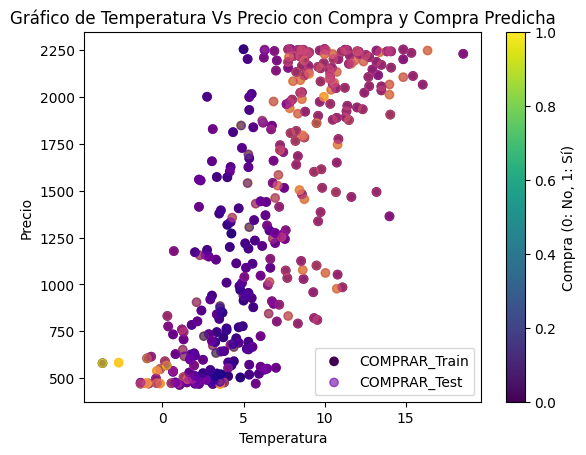

In [60]:


# Definimos el gráfico con la función scatter para df_filtrado['COMPRAR']
scatter1 = plt.scatter(df_filtrado['T_PROM'], df_filtrado['PRECIO_KG_HELADO'], c=df_filtrado['COMPRAR'], label='COMPRAR_Train', alpha=1, cmap='viridis')

# Definimos el gráfico con la función scatter para df_filtrado['COMPRAR_PED']
scatter2 = plt.scatter(df_filtrado['T_PROM'], df_filtrado['PRECIO_KG_HELADO'], c=df_filtrado['COMPRAR_PRED'], label='COMPRAR_Test', alpha=0.6, cmap='plasma')

# Agregamos etiquetas y título
plt.xlabel('Temperatura')
plt.ylabel('Precio')
plt.title('Gráfico de Temperatura Vs Precio con Compra y Compra Predicha')

# Mostramos la barra de color
plt.colorbar(scatter1, label='Compra (0: No, 1: Sí)')

# Mostramos la leyenda y el gráfico
plt.legend()
plt.show()


